In [2]:
import numpy as np
import matplotlib.pyplot as plt


Illustrate that the matrix is used to rotate and scale the vector

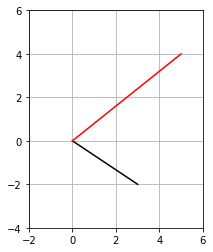

In [7]:
v = np.array([3,-2])
A = np.array([[1,-1],[2,1]])
w = A@np.matrix.transpose(v)

plt.plot([0, v[0]], [0, v[1]], 'k', label='v1')
plt.plot([0, w[0]], [0, w[1]], 'r', label='v2')

plt.axis('square')
plt.axis((-2,6,-4,6))
plt.grid()
plt.show()

illustrate that the matrix is only used to rotate and not to scale (pure rotation matrix)

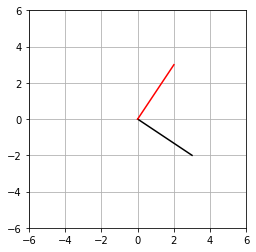

In [16]:
theta = np.pi/2
v = np.array([3,-2])
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

w = A@np.matrix.transpose(v)


plt.plot([0, v[0]], [0, v[1]], 'k', label='v1')
plt.plot([0, w[0]], [0, w[1]], 'r', label='v2')

plt.axis('square')
plt.axis((-6,6,-6,6))
plt.grid()
plt.show()

Code challenge: pure and impure rotation
---



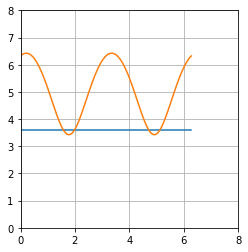

In [38]:
thetas = np.linspace(0, 2*np.pi, 100)
result = np.zeros((thetas.size,2))


for n in range(thetas.size):
    theta = thetas[n]
    v = np.array([3,-2])
    A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    AI = np.array([[2*np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    
    w = A@np.matrix.transpose(v)
    wi = AI@np.matrix.transpose(v)
    
    mag = np.linalg.norm(w)
    magi= np.linalg.norm(wi)
    
    result[n, 0] = mag  
    result[n, 1] = magi
    
plt.plot(thetas, result)
plt.axis('square')
plt.axis((0,8,0,8))
plt.grid()
plt.show()